# Projet numérique de probabilités 

## Préambule

Dans ce projet, on va chercher à développer un algorithme permettant de générer des textures aléatoires reprenant certaines caractéristiques du mouvement brownien.
Dans un premier temps, on va s'intéresser à construire le mouvement brownien en une dimension comme limite d'une marche aléatoire. On verra ensuite une construction alternative qui permettra de conserver certaines de ses propriétés puis on la généralisera à 2 dimensions.


# Marche aléatoire

Soit $(X_i)_{i\in \mathbb{N}^\ast}$ une suite de variables aléatoires indépendantes telle que :

$$\mathbb{P}(X_i=x) = \left\{\begin{array}{ll}
\frac{1}{2} & \text{ si } x=1\\
\frac{1}{2} & \text{ si } x=-1\\
\end{array}\right.
\forall i\geq 1$$

On considère la suite $(Y_n)_{n \in \mathbb{N}}$, où $Y_0 = 0$ et 
$$Y_n=\sum_{i=1}^{n}X_i$$


1. Calculer l'espérance et la variance de $X_i$.
2. En déduire l'espérance et la variance de $Y_n$.
3. Montrer que $\forall n \in \mathbb{N}$, $\mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}}$. On dit que la suite $(Y_n)_{n \in \mathbb{N}}$ possède la propriété de Markov.
4. Montrer que $\mathrm{Cov}(Y_n,Y_{n'}) = \min(n,n')$ puis que $\frac12\mathbb{E}\left((Y_n-Y_{n+h})^2\right) = h/2$, pour $h>0$. Cette dernière quantité s'appelle le variogramme de $Y_n$ et peut s'interpréter comme une quantification de sa régularité.
5. Utiliser le théorème central limite pour montrer que
  $$\frac{Y_n}{\sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1),$$


**Réponses**

1. Soit $i \in \mathbb{N}^*$.

$\ X_i$ est nulle presque partout donc intégrable et de carré intégrable, ce qui justifie l'existence de son espérance et de sa variance.

On a : $$\mathbb{E}(X_i) = \sum_{x \in X(\Omega)} x \ \mathbb{P}(X_i=x) = 1 \times \frac{1}{2} + \ (-1) \times \frac{1}{2} = 0.$$

Et $$\mathbb{V}(X_i) = \mathbb{E}(X_i^2) + \mathbb{E}(X_i)^2 = \sum_{x \in X(\Omega)} x^2 \ \mathbb{P}(X_i=x) = 1 \times \frac{1}{2} + 1 \times \frac{1}{2} = 1.$$

2. Soit $n \in \mathbb{N}^*$.

$Y_n$ est de carré intégrable comme somme finie de variables aléatoires de carré intégrable, ce qui justifie l'existence de son espérance et de sa variance.

On a donc, par indépendance des $(X_i)$:
$$\mathbb{E}(Y_n) = \sum_{i=1}^n \mathbb{E}(X_i) = 0$$

Et: $$\mathbb{V}(Y_n) = \sum_{i=1}^n \mathbb{V}(X_i) = n.$$

3. Soit $(y_0, \ldots, y_n) \in \mathbb{R}^n$. 

Remarquons déjà que $forall i \in \{1, \ldots, n-1 \}, \ X_n$ et $Y_i$ sont indépendantes : $f:(y_0, \ldots, y_i, y_n) \mapsto (\sum_{j=0}^{i} y_i, y_n)$ est mesurable et déterministe. Par transfert d'indépendance, on en déduit l'indépendance de $X_n$ et $Y_i$.

**Sans doute pas la bonne méthode**
\begin{align*}
\mathbb{P}(Y_n = y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0})
    &= \mathbb{P}(X_n = y_n-y_{n-1}|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}) \\
    &= \mathbb{P}(X_n = y_n-y_{n-1}) \text{ par indépendance de } X_n \text{ et les } Y_i \ \forall i \in \{ 1, \ldots, n-1 \}\\
\end{align*}

Et par indépendance de $X_n$ et $Y_{n-1}$ :

$$\mathbb{P}(Y_n = y_n|Y_{n-1} = y_{n-1}) = \mathbb{P}(X_n = y_n - y_{n-1}|Y_{n-1} = y_{n-1}) = \mathbb{P}(X_n = y_n - y_{n-1}).$$

D'où : $$\boxed{\mathbb{P}(Y_n = y_n|Y_{n-1} = y_{n-1}) = \mathbb{P}(Y_n = y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0})}$$


4. Soit $(n, n') \in (\mathbb{N}^*)^2$.

\begin{align*}
Cov(Y_n, Y_{n-1}) 
        &= \mathbb{E}((Y_n - \mathbb{E}(Y_n))(Y_{n'} - \mathbb{E}(Y_{n'}))) \\
        &= \mathbb{E}(Y_nY_{n'}) - \mathbb{E}(Y_n)\mathbb{E}(Y_{n'})\\
        &= \mathbb{E}(Y_nY_{n'})
\end{align*}

Or
\begin{align*}
Y_nY_{n'}
    &= (\sum_{i=1}^n X_i)(\sum_{i=1}^{n'} X_i) \\
    &= \sum_{i=1}^{min(n,n')} X_i^2 + \sum_{1 \leq i \leq n \\ 1 \leq j \leq n' \\ i \neq j} X_iX_j \\
\mathbb{Y_nY_{n'}}
    &= \sum_{i=1}^{min(n,n')} 1 + \sum_{1 \leq i \leq n \\ 1 \leq j \leq n' \\ i \neq j} 0 \\
    &= min(n, n')
\end{align*}

D'où $$\boxed{Cov(Y_n, Y_{n-1}) = min(n, n')}.$$

Ensuite, $\forall h \in \mathbb{N}^*$, on a :

\begin{align*}
\frac{1}{2} \mathbb{E}((Y_n - Y_{n+h}^2)^2)
    &= \frac{1}{2} (\mathbb{E}(Y_n^2) \mathbb{E}(Y_{n+h}^2) - 2 \mathbb{E}(Y_nY_{n+h})) \\
    &= \frac{1}{2} (n + (n+h) - 2n) \text{ d'après le calcul précédent} \\
    &= \frac{h}{2}.
\end{align*}

5. Les $X_n$ sont des variables aléatoires réelles, indépendantes et de même loi, de carré intégrable, d'espérance $0$ et de variance $1$.

Par le théorème central limite, on a $\frac{\sum_{i=1}^n X_i - n \times 0}{1 \times \sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$

Donc $$ \boxed{\frac{Y_n}{\sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)}$$

**Vérifier qu'il n'y a rien ensuite**

In [1]:
# chargement de dépendances
%pylab inline
import scipy.stats as sps

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Initialisation de la graine
np.random.seed(1234)

# Comportement asymptotique

On introduit maintenant $t_i=\frac{i}{n}, i=0,\ldots,n$ et
$$Z^{(n)}_t= \frac{Y_{[nt]}}{\sqrt{n}}, t\in[0,1],$$
où $[\cdot]$ est la partie entière.

1. Montrer que $\bigcup_{i=0}^{n-1}(t_i,t_{i+1}]$ forme une partition de $(0,1]$.

2. Montrer que $Z^{(n)}_t=Z^{(n)}_{t_i}$ pour $i=[nt]$.

3. Par conséquent, $Z^{(n)}_t, t\in[0,1]$ est bien défini $\forall t \in [0,1]$. Implémenter un algorithme pour simuler $Z^{(n)}_t$ aux points $t_i,~ i \in\{0,\ldots,n\}$. Représenter une trajectoire pour $n$=1000.



**Réponses**

1. Déjà, les $(t_i, t_{i+1}]$ sont deux à deux disjoints. Ensuite :
\begin{align*}
\bigcup_{i=0}^{n-1}(t_i, t_{i+1}] 
    &= \bigcup_{i=0}^{n-1}(\frac{i}{n}, \frac{i+1}{n}]\\
    &= (\frac{0}{n}, \frac{n}{n}]\\
    = (0, 1]
\end{align*}
Donc les $(t_i, t_{i+1}]$ forment une partition de $(0, 1]$.

2. On a $[nt_i] = [n\frac{i}{n}] = [i] = [nt]$ donc $Y_{[nt]} = Y_{[nt_i]}$. D'où $Z^{(n)}_t=Z^{(n)}_{t_i}$ pour $i=[nt]$.

3.

In [3]:
#pas sure de la méthode
def X_i():
    if np.random.uniform(0,1)<0.5:
        return -1
    else:
        return 1

def Y_n(n):
    res = 0
    for _ in range(n):
        res += X_i()
    return res

def Z(t, n):
    return Y(math.floor(n*t))/np.sqrt(n)

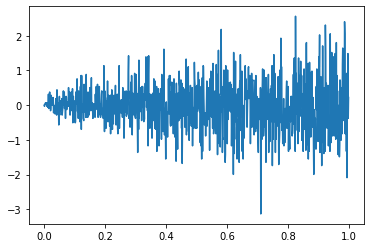

In [4]:
n = 1_000

X = [i/n for i in range(n)]
Y = [Z(x, n) for x in X]
plt.plot(X, Y)
plt.show()

4. Montrer que $Z^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,t),~\forall t \in [0,1]$, en déduire la loi de $Z^{(n)}_1=\frac{Y_n}{\sqrt{n}}$ quand $n$
  tend vers l'infini.
  Construire un échantillon de taille 1000 de valeurs de $Z^{(n)}_1$ pour n = 1000. Représenter son histogramme et le comparer avec la densité gaussienne standard.



**Remarque**

${\bf Z}_t=\lim_{n \to \infty} Z^{(n)}_t$ est le mouvement brownien standard sur $[0,1]$. 


# Une construction alternative

On considère maintenant la construction suivante, définie pour tout $t \in [0,1]$:
$$\tilde{Z}^{(n)}_t = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))$$
où les $X_i$ sont définis tels que précédemment et les $U_i$ sont des variables aléatoires i.i.d. de loi uniforme sur $[0,1]$.
Cette construction permet de définir un algorithme alternatif de simulation d'une (approximation de) trajectoire brownienne, cette fois-ci non standard au sens où on n'a pas systématiquement $\tilde{Z}^{(n)}_0 = 0$.

1. Discrétiser l'intervalle $[0,1]$ en 1000 points de manière régulière et implémenter l'algorithme (commencer par n = 1). Représenter une trajectoire pour $n = 1000$.

2. Calculer l'espérance et la variance de $\tilde{Z}^{(n)}_t$. En déduire que $\forall t \in [0,1],~ \tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$. Le vérifier expérimentalement aux points $\{0,0.25,0.5,0.75,1\}$ sur la base d'un échantillon de 1000 réalisations de $\tilde{Z}^{(n)}$.

3. Montrer que $\frac12\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) =  a h$ pour $h>0$ et tel que $t+h \leq 1$, pour une constante $a$ à déterminer.

4. Le vérifier expérimentalement en calculant $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$, où $\text{card}\{(i,j),|t_i-t_j|=h\}$ représente le nombre de couples $(t_i,t_j)$ distants de $h$, pour $h \in \{0.001,0.002,\ldots,0.3\}$. Représenter graphiquement cette quantité.

5. Décrire les différences et les similarités entre les deux approches.

# Génération de texture

L'algorithme précédent présente la propriété d'être aisément généralisable aux dimensions supérieures, contrairement au premier. Nous allons maintenant construire pas à pas un algorithme pour simuler selon ce modèle sur le domaine $[-1, 1]^2$. Comme dans le cas 1D, on va procéder par séparations aléatoires du domaine. Pour ce faire, nous allons simuler des droites aléatoires, avec la paramétrisation suivante :
$$x \cos(\alpha) + y \sin(\alpha) = p,$$
où $x,y \in [0,1]$ sont les coordonnées, $\alpha \sim \mathcal{U}_{[0,\pi]}$ est la variable d'*orientation*, $p \sim \mathcal{U}_{[-\sqrt{2},\sqrt{2}]}$ est la variable de *position*.

On peut ainsi écrire la version 2D de $\tilde{Z}$ de la manière suivante :
$$\tilde{Z}^{(n)}_{(x,y)} = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{\{x \cos(\alpha) + y \sin(\alpha) \leq p\}}-1_{\{x \cos(\alpha) + y \sin(\alpha) > p\}})$$

1. Représenter 10 droites aléatoires sur le domaine $[-1, 1]^2$.

2. L'étape suivante consiste à attribuer une valeur +1 ou -1 à chaque partie du domaine, délimitées par une droite aléatoire. Générer une droite aléatoire, puis assigner une valeur aléatoire +1 ou -1 en tous points d'une grille régulière de discrétisation du domaine $[-1,1]^2$ de dimensions 200x200 (voir **np.meshgrid** et **plt.pcolormesh**).

3. Combiner les résultats des deux questions précédentes pour générer une réalisation de $\tilde{Z}$ sur $[-1,1]^2$ pour $n = 100, 1000$ et $10000$ sur la même grille de discrétisation. Commenter. 

4. Calculer $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$ pour $h \in \{0.001,0.002,\ldots,0.3\}$ le long des axes verticaux et horizontaux. Tracer le graphique correspondant. Commenter.

5. Générer une réalisation de $\tilde{Z}$ sur $[-10,10]^2$. On prendra soin de modifier la loi des paramètres des droites aléatoires en conséquence. Commenter. 

6. Une généralisation à deux dimensions d'une discrétisation du mouvement brownien standard peut être définie de la manière suivante : notant $(x_i,y_i)$ les coordonnées des points de la grille de discrétisation du domaine $[0,1]^2$, le vecteur formé des $Z_{(x_i,y_i)}$ est gaussien, centré et de covariance $\text{Cov} = \min(x_i,x_j) \times \min(y_i,y_j)$. Proposer et implémenter un algorithme de simulation de ce modèle sur une grille régulière de discrétisation du domaine $[0,1]^2$. Quelles difficultés rencontrez-vous ?